# Práctica 2: Aprendizaje automático

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de __2 notebooks__ que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Nombres de los estudiantes: Miguel Ángel Molina de la Rosa y Carmen Miguel Spínola__

# Apartado 2: Regresión

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino.

La calidad del vino es una variable que toma valores entre 0 y 10.

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal.

## 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe.

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

Importamos librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Cargamos el fichero con los datos

In [2]:

# Cargar datos
df = pd.read_csv('calidad_vinos.csv')

# Mostrar primeros registros
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Obtenemos información básica

In [3]:
print("Información del Dataset:")
df.info()

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Obtenemos un resumen estadísitco

In [4]:
print("\nEstadísticas descriptivas:")
descripcion = df.describe()
print(descripcion)


Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000  

Usamos el coeficiente de variación para detectar rápidamente qué variables tienen valores extremos más acusados (mayor dispersión relativa)

In [5]:
stats = df.describe().T
stats['coef_variacion'] = stats['std'] / stats['mean']
stats = stats.sort_values(by='coef_variacion', ascending=False)
stats[['mean', 'std', 'coef_variacion']]

,mean,std,coef_variacion
citric acid,0.270976,0.194801,0.718888
total sulfur dioxide,46.467792,32.895324,0.707917
free sulfur dioxide,15.874922,10.460157,0.658911
residual sugar,2.538806,1.409928,0.555351
chlorides,0.087467,0.047065,0.538095
volatile acidity,0.527821,0.179060,0.339244
sulphates,0.658149,0.169507,0.257551
fixed acidity,8.319637,1.741096,0.209276
quality,5.636023,0.807569,0.143287
alcohol,10.422983,1.065668,0.102242


Por lo tanto, la variable con valores extremos más acusados respecto a su media es __citric acid__

La variable más concentrada alrededor de su media es la que tiene menor coeficiente de variación, en este caso __density__

__citric acid (extremos más acusados)__:
Esta alta variabilidad indica que posee valores alejados de su media, lo que puede introducir ruido o valores atípicos en el modelo. Esto podría dificultar al perceptrón multicapa aprender patrones claros, haciendo necesaria una buena estrategia de preprocesado (por ejemplo, escalado o normalización) para evitar que estos valores extremos distorsionen el aprendizaje.

__density (más concentrada)__:
Al tener tan poca variabilidad, esta variable es más predecible y podría contribuir menos en términos de discriminación entre diferentes calidades. Sin embargo, podría ser útil precisamente por su estabilidad, facilitando que el modelo extraiga patrones fiables sobre la calidad del vino.

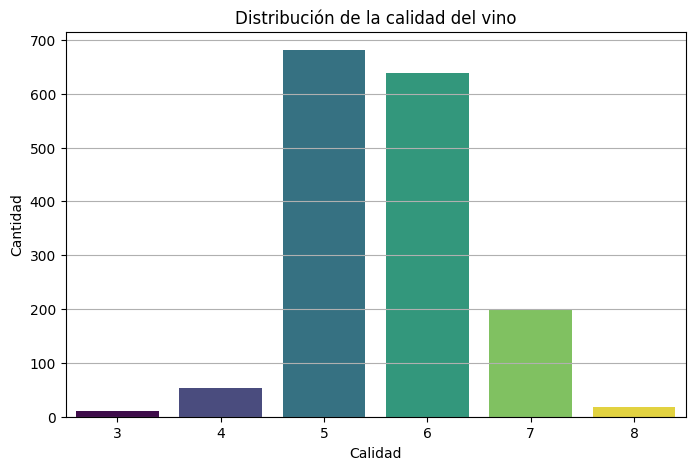

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality', hue='quality', palette='viridis', legend=False)
plt.title('Distribución de la calidad del vino')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.show()

a distribución está fuertemente concentrada en los valores intermedios (5 y 6), siendo estos los valores más comunes. Las categorías extremas (3 y 8) presentan una cantidad muy reducida de muestras, lo cual indica un desbalance significativo en el conjunto de datos.

La calidad del vino tiene una distribución que podría considerarse aproximadamente normal, ya que los valores más altos (7 y 8) son mucho menos frecuentes que los valores medios.

Este desbalance puede afectar al entrenamiento del perceptrón multicapa, haciendo que el modelo tenga dificultades para aprender adecuadamente las clases menos frecuentes.

La predicción puede verse sesgada hacia las clases predominantes (5 y 6)

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

In [7]:
correlaciones = df.corr()['quality'].drop('quality')
print("Correlaciones con 'quality':\n", correlaciones.abs().sort_values(ascending=False))

Correlaciones con 'quality':
 alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


Las variables que muestran una mayor correlación con la calidad del vino son:

- __alcohol (0.476)__: La más correlacionada. Esto indica que un aumento en el contenido alcohólico suele relacionarse positivamente con una calidad superior del vino.

- __volatile acidity (0.391)__: Tiene una alta correlación negativa (aunque aquí se muestre solo el valor absoluto). Normalmente, mayor acidez volátil se asocia con peor calidad.

- __sulphates (0.251) y citric acid (0.226)__: Tienen correlaciones moderadas con la calidad. Estos compuestos pueden influir notablemente en las características del vino.

Variables como __residual sugar (0.0137__) o __free sulfur dioxide (0.0506)__ presentan correlaciones casi nulas con la calidad del vino, indicando poca o nula influencia directa en esta.

Considerando estas correlaciones, podrías establecer como umbral una correlación mínima de aproximadamente 0.2, seleccionando así las variables más relevantes que serían:
alcohol, volatile acidity, sulphates, citric acid, total sulfur dioxide, density, chlorides, fixed acidity.

Esto reducirá el ruido en tu modelo, mejorando potencialmente su rendimiento y facilitando la interpretación de resultados.

Establecemos el umbral

In [8]:
umbral = 0.2


In [9]:
# Seleccionar variables cuya correlación absoluta con 'quality' sea mayor que el umbral
variables_seleccionadas = correlaciones[correlaciones.abs() > umbral].index.tolist()

print(f"\nVariables seleccionadas (|correlación| > {umbral}): {variables_seleccionadas}")

# Crear un nuevo dataframe con 'quality' y las variables seleccionadas
df_seleccionado = df[['quality'] + variables_seleccionadas]

# Mostrar el nuevo dataframe
print("\nNuevo dataframe con variables seleccionadas:\n", df_seleccionado.head())


Variables seleccionadas (|correlación| > 0.2): ['volatile acidity', 'citric acid', 'sulphates', 'alcohol']

Nuevo dataframe con variables seleccionadas:
    quality  volatile acidity  citric acid  sulphates  alcohol
0        5              0.70         0.00       0.56      9.4
1        5              0.88         0.00       0.68      9.8
2        5              0.76         0.04       0.65      9.8
3        6              0.28         0.56       0.58      9.8
4        5              0.70         0.00       0.56      9.4


## 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


El entrenamiento de una red neuronal basada en descenso de gradiente es sensible a las escalas diferentes de las variables:
 Variables con valores mucho más grandes dominan la actualización de pesos y podrían dificultar que la red neuronal aprenda adecuadamente las relaciones con variables más pequeñas.

El entrenamiento es más rápido, estable y eficiente cuando las variables están en la misma escala.

La opción más razonable es la estandarización:  Al usar estandarización, cada variable tendrá media 0 y desviación típica 1, mitigando así el impacto negativo de valores extremos. Además, facilita un entrenamiento más estable y rápido del perceptrón multicapa. Por último Las variables pasarán a contribuir de manera más equilibrada en el entrenamiento.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dividir datos en entrada (X) y salida (y)
X = df.drop('quality', axis=1)
y = df['quality']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Estandarización de variables (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4) Primer modelo: kNN

Antes de pasar a crear las redes neuronales, vamos crear unos primeros modelos más sencillos para comparar. Para ello:

- Crea varios modelos kNN con distintos valores de k (de 2 a 20 vecinos)
- Calcula el MSE de cada uno de ellos, utilizando validación cruzada, para elegir el mejor valor de k

Para elegirlo, pinta el gráfico de MSE para los distintos valores de k.

Con los datos ya normalizados

Importamos librerias

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split

In [12]:
k_range = range(2, 21)
mse_scores = []

In [13]:
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Usar cross-validation con MSE negativo (porque scikit-learn devuelve el negativo del error)
    mse = -cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse_scores.append(mse)

# Mostrar resultados
for k, mse in zip(k_range, mse_scores):
    print(f"k = {k} --> MSE = {mse:.4f}")

k = 2 --> MSE = 0.5678
k = 3 --> MSE = 0.5170
k = 4 --> MSE = 0.4965
k = 5 --> MSE = 0.4906
k = 6 --> MSE = 0.4852
k = 7 --> MSE = 0.4799
k = 8 --> MSE = 0.4726
k = 9 --> MSE = 0.4701
k = 10 --> MSE = 0.4701
k = 11 --> MSE = 0.4660
k = 12 --> MSE = 0.4662
k = 13 --> MSE = 0.4664
k = 14 --> MSE = 0.4628
k = 15 --> MSE = 0.4590
k = 16 --> MSE = 0.4586
k = 17 --> MSE = 0.4567
k = 18 --> MSE = 0.4552
k = 19 --> MSE = 0.4534
k = 20 --> MSE = 0.4538


Graficamos

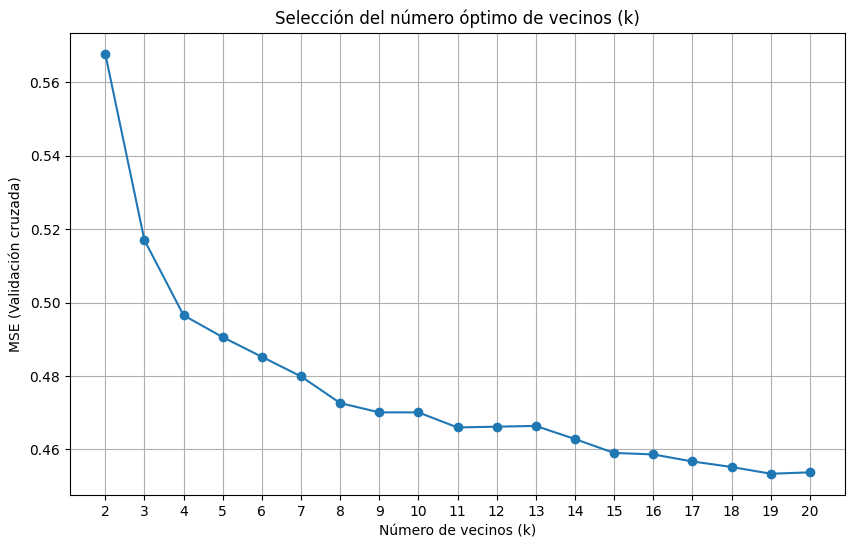

In [14]:
plt.figure(figsize=(10,6))
plt.plot(k_range, mse_scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('MSE (Validación cruzada)')
plt.title('Selección del número óptimo de vecinos (k)')
plt.xticks(k_range)
plt.grid(True)

Del gráfico podemos concluir que, conforme aumentamos el número de vecinos (k), el valor del MSE disminuye considerablemente hasta estabilizarse alrededor de valores altos (entre 15 y 20). Esto indica que los modelos con valores pequeños de k (como k=2 o k=3) tienen un error relativamente alto debido posiblemente a sobreajuste o sensibilidad a ruido en los datos. A medida que aumentamos k, el modelo promedia más muestras y reduce la variabilidad, disminuyendo así el error. Sin embargo, valores muy grandes de k podrían llegar a ser demasiado generales y perder detalle fino del problema. El valor óptimo en este caso parece encontrarse alrededor de k=20, ya que logra el menor MSE observado.

## 5) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica.

Una vez tengas la curva de aprendizaje:
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


In [15]:
import numpy as np
from sklearn.neural_network import MLPRegressor

In [16]:
# Valores de alpha para regularización
alphas = np.logspace(-4, 1, 10)

# Configuración de perceptrones
perceptrones = {
    'Una capa (250 neuronas)': (250,),
    'Varias capas (150, 75, 25 neuronas)': (150, 75, 25)
}

resultados = {}

# Evaluar ambos perceptrones
for nombre, arquitectura in perceptrones.items():
    mse_means = []
    mse_stds = []

    for alpha in alphas:
        modelo = MLPRegressor(hidden_layer_sizes=arquitectura,
                              alpha=alpha,
                              max_iter=2000,
                              random_state=42)

        mse_scores = -cross_val_score(modelo, X_train_scaled, y_train,
                                      scoring='neg_mean_squared_error',
                                      cv=5)

        mse_means.append(mse_scores.mean())
        mse_stds.append(mse_scores.std())

    resultados[nombre] = {'means': mse_means, 'stds': mse_stds}


Graficamos..

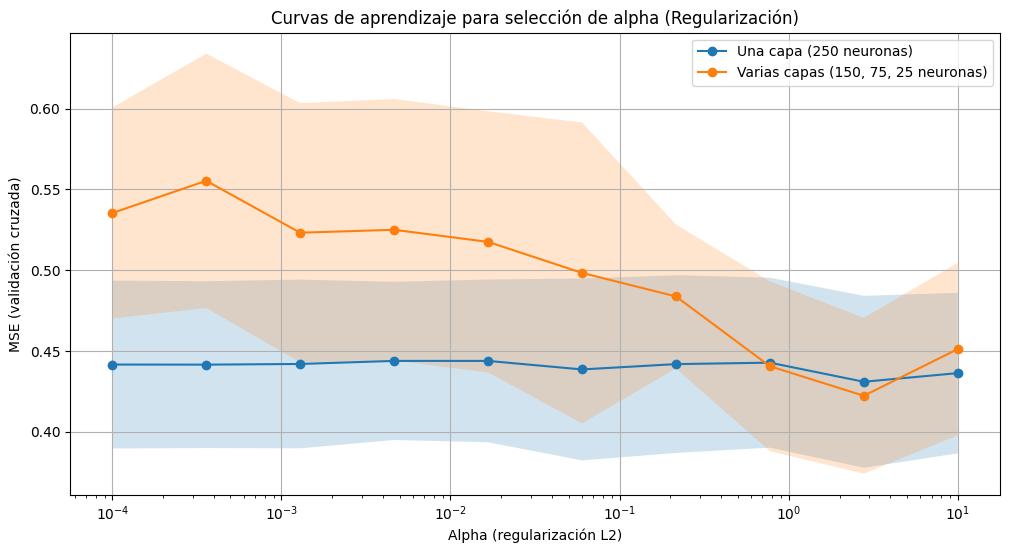

In [17]:
plt.figure(figsize=(12, 6))

for nombre in perceptrones.keys():
    means = resultados[nombre]['means']
    stds = resultados[nombre]['stds']

    plt.plot(alphas, means, marker='o', label=f'{nombre}')
    plt.fill_between(alphas,
                     np.array(means) - np.array(stds),
                     np.array(means) + np.array(stds),
                     alpha=0.2)

plt.xscale('log')
plt.xlabel('Alpha (regularización L2)')
plt.ylabel('MSE (validación cruzada)')
plt.title('Curvas de aprendizaje para selección de alpha (Regularización)')
plt.legend()
plt.grid(True)
plt.show()

Del gráfico se observa claramente que la red neuronal con una sola capa oculta de 250 neuronas obtiene en general un mejor desempeño (menor MSE promedio) y es más estable (menor desviación típica) que la red neuronal más profunda (con 150, 75 y 25 neuronas). La red neuronal profunda presenta un comportamiento más volátil y una mayor incertidumbre (área sombreada más amplia).

Aunque en ambas redes neuronales se observa una leve mejora (reducción del MSE) conforme aumenta el valor de regularización alpha, la diferencia no es muy marcada para la red de una sola capa, indicando que esta red es bastante robusta frente al parámetro alpha.

En conclusión, la red neuronal de una sola capa oculta (250 neuronas) domina claramente en términos de rendimiento y estabilidad. El valor óptimo del parámetro de regularización alpha para esta configuración parece situarse en torno a alpha = 1.0 (10⁰), ya que proporciona el menor error y buena estabilidad. Por lo tanto, sería razonable elegir esta configuración para continuar trabajando.

## 6) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada.

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones.
- Compara los resultados obtenidos (al menos MSE) con el mejor modelo de kNN.

Importamos librerias

In [22]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Separamos las variables del dataset en variables de entrada (predictoras) y variable objetivo (salida)

In [24]:

# Dividir entrada y salida
X = df.drop('quality', axis=1)
y = df['quality']

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

entrenamos y evaluamos la red neuronal elegida

In [25]:
# Modelo elegido (una sola capa oculta con 250 neuronas y alpha=1.0)
modelo_final = MLPRegressor(hidden_layer_sizes=(250,), alpha=1.0, max_iter=2000, random_state=42)

# Realizar predicción mediante validación cruzada
y_pred = cross_val_predict(modelo_final, X_scaled, y, cv=5)

# Métricas de evaluación
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# Distribución del error absoluto
errores = np.abs(y - y_pred)

MSE: 0.4281
MAE: 0.5068
R²: 0.3432


- __MSE (0.4281)__: El error cuadrático medio es relativamente bajo, lo cual indica que, en promedio, las predicciones del modelo no están muy alejadas de los valores reales. Este valor indica un rendimiento razonable considerando que la calidad del vino está entre 0 y 10.

- __MAE (0.5068)__: El error absoluto medio muestra que, en promedio, las predicciones del modelo se desvían aproximadamente en ±0.51 puntos de la calidad real. Esto representa un error aceptable teniendo en cuenta que la escala original va de 0 a 10, aunque podría implicar algunas dificultades para distinguir vinos con calidades muy próximas entre sí.

- __R² (0.3432)__: Este valor muestra que el modelo explica alrededor del 34% de la variabilidad total en la calidad del vino. Aunque esto indica una cierta capacidad predictiva, aún hay bastante margen de mejora.

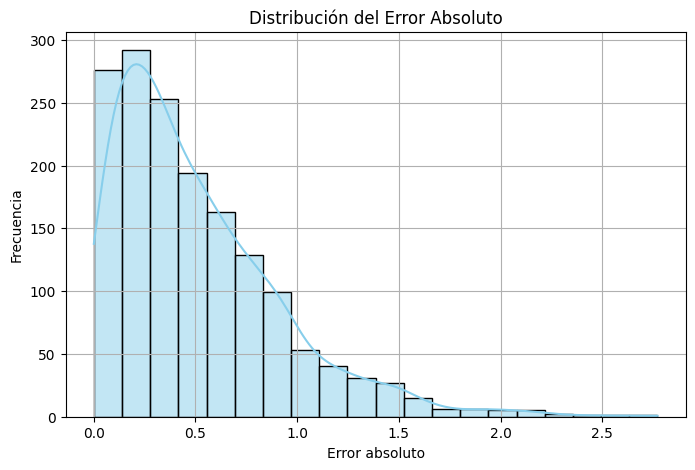

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(errores, bins=20, kde=True, color='skyblue')
plt.title('Distribución del Error Absoluto')
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

El histograma muestra que la mayoría de las predicciones del modelo tienen errores absolutos relativamente pequeños, concentrándose principalmente alrededor del rango entre 0 y 0.5. Esto indica que, en general, el modelo predice con bastante precisión la calidad del vino.

Sin embargo, también se observa que hay casos aislados con errores mayores a 1.5 o incluso 2.0 puntos, aunque son muy pocos. Estos casos son vinos para los que el modelo falla significativamente. Aunque hay espacio para mejorar, el modelo funciona razonablemente bien para la mayoría de las observaciones. Sus principales limitaciones parecen estar en casos extremos o menos representados en los datos originales

In [28]:
errores_df = df_vinos.copy()
errores_df['error_absoluto'] = errores
peores_predicciones = errores_df.sort_values('error_absoluto', ascending=False).head(10)
print("Vinos con mayores errores:\n", peores_predicciones)

Vinos con mayores errores:
      fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  \
832   10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.998320000...                                                                                                  
1374  6.8,0.815,0.0,1.2,0.267,16.0,29.0,0.99471,3.32...                                                                                                  
652   15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98...                                                                                                  
151   9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2....                                                                                                  
1276  8.5,0.4,0.4,6.3,0.05,3.0,10.0,0.99566,3.28,0.5...                                                                                                  
480   10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,

Estos errores oscilan aproximadamente entre 2.09 y 2.77 puntos, lo que es bastante significativo teniendo en cuenta que la calidad se mide en una escala de 0 a 10.

Esto indica claramente que, aunque el modelo predice con precisión en la mayoría de los casos, hay muestras específicas que presentan características particulares (posiblemente valores atípicos o combinaciones poco comunes de variables) que el modelo no logra capturar adecuadamente

En conclusión, aunque el modelo es aceptable en términos generales, claramente muestra limitaciones para manejar casos especiales o atípicos, algo típico en este tipo de análisis predictivos.

In [32]:
df['error_absoluto'] = errores
error_por_calidad = df.groupby('quality')['error_absoluto'].mean()

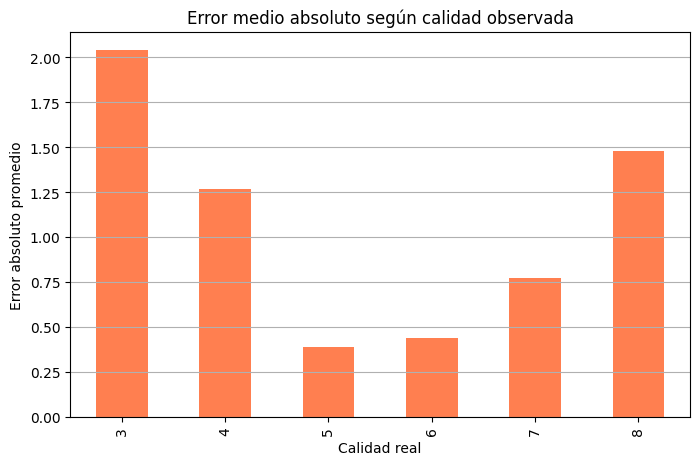


Error absoluto promedio por calidad observada:
 quality
3    2.038893
4    1.268138
5    0.388033
6    0.435733
7    0.774027
8    1.475659
Name: error_absoluto, dtype: float64


In [33]:
plt.figure(figsize=(8,5))
error_por_calidad.plot(kind='bar', color='coral')
plt.title('Error medio absoluto según calidad observada')
plt.xlabel('Calidad real')
plt.ylabel('Error absoluto promedio')
plt.grid(axis='y')
plt.show()

print("\nError absoluto promedio por calidad observada:\n", error_por_calidad)

Este gráfico muestra claramente cómo varía el error absoluto promedio según la calidad real de los vinos. Observamos que el error es notablemente mayor para los vinos con calidades más extremas (3 y 8), superando incluso los 2 puntos en calidad 3, mientras que es considerablemente menor para vinos con calidades intermedias (especialmente 5 y 6).

Esto ocurre principalmente porque los vinos con calidades extremas son menos frecuentes en el dataset, haciendo que el modelo tenga menos datos para aprender correctamente las características particulares de estos casos menos comunes. Por lo tanto, el modelo predice de forma más efectiva las calidades medias (que dominan el dataset), pero presenta claras limitaciones para manejar casos menos frecuentes, que son precisamente los que presentan mayores errores.

*Para comparar claramente los resultados obtenidos entre los dos modelos*:

- __Mejor modelo kNN__ (k=20) obtuvo aproximadamente un __MSE ≈ 0.46__ en validación cruzada.

- __Perceptrón multicapa__ (una capa de 250 neuronas con alpha=1.0) obtuvo un __MSE = 0.4281__.

La comparación muestra que el perceptrón multicapa mejora ligeramente respecto al mejor modelo kNN, ya que logra reducir el error cuadrático medio. Esta reducción, aunque modesta, indica que la red neuronal captura relaciones más complejas entre las variables y la calidad del vino en comparación con el método más sencillo de kNN.

En resumen, la red neuronal proporciona un rendimiento ligeramente superior al modelo kNN, justificando así la elección de un modelo más complejo para este caso